In [1]:
import cf_xarray
import gribberish
import xarray as xr

ds = xr.open_dataset('./hrrr.t06z.wrfsfcf01.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:                                    (time: 1, y: 1059, x: 1799,
                                                isobar_0: 7, isobar_1: 5,
                                                hag_0: 2, isobar_2: 4,
                                                hag_1: 2, isotherm: 2)
Coordinates:
  * time                                       (time) datetime64[ns] 2023-07-...
  * isotherm                                   (isotherm) float64 253.0 263.0
  * isobar_0                                   (isobar_0) float64 2.5e+04 ......
  * isobar_1                                   (isobar_1) float64 5e+04 ... 1...
  * isobar_2                                   (isobar_2) float64 5e+04 ... 1...
  * hag_0                                      (hag_0) float64 10.0 80.0
  * hag_1                                      (hag_1) float64 1e+03 4e+03
  * y                                          (y) float64 -1.581e+06 ... 1.5...
  * x                                          (x) float64 -2.701e+06 ... 2.6...
    latitude                                   (y, x) float64 ...
    longitude                                  (y, x) float64 ...
Data variables: (12/60)
    pot                                        (time, y, x) float64 ...
    pres_PRESsfc_fcst                          (time, y, x) float64 ...
    pwat                                       (time, y, x) float64 ...
    hgt_HGTzero_deg_isotherm_fcst              (time, y, x) float64 ...
    hgt_HGTadiabatic_condensation_lifted_fcst  (time, y, x) float64 ...
    hgt_HGThtfl_fcst                           (time, y, x) float64 ...
    ...                                         ...
    hgt_HGTisotherm_fcst                       (time, isotherm, y, x) float64 ...
    lcdc                                       (time, y, x) float64 ...
    hgt_HGTclt_fcst                            (time, y, x) float64 ...
    apcp                                       (time, y, x) float64 ...
    prate                                      (time, y, x) float64 ...
    frzr                                       (time, y, x) float64 ...
Attributes:
    meta:     Generated with gribberishpy

CPU times: user 607 ms, sys: 59.1 ms, total: 666 ms
Wall time: 694 ms


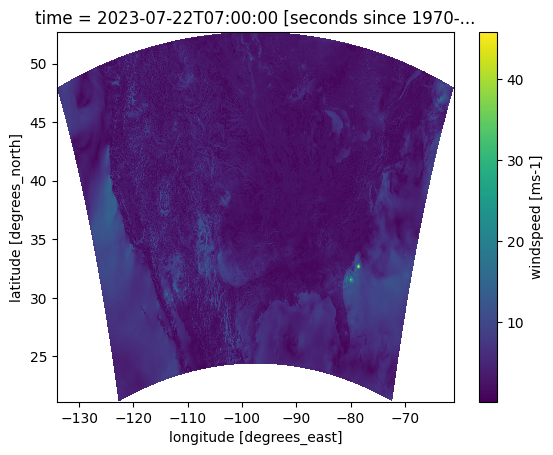

In [2]:
%%time
ds.wind.cf.isel(time=0).plot(x='longitude', y='latitude')

In [4]:
import pyproj
to_xy = pyproj.Transformer.from_crs('epsg:4326', ds.wind.crs, always_xy=True).transform

In [5]:
lat, lng = 41.42717976016072, -71.462122760827

x_sel, y_sel = to_xy(lng, lat)

lat_selected = ds['latitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lat_selected.values)

lng_selected = ds['longitude'].sel(x=x_sel, y=y_sel, method='nearest')
print(lng_selected.values)

selected = ds.prate.sel(x=x_sel, y=y_sel, method='nearest')
selected.values

41.41992272540395
-71.47008808568133


array([0.])